In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


a) Generate a scatter plot of the data in “customers_data.csv”. Color code the data points to visualize the datapoints belonging to each class.

In [3]:
file_path = '/content/drive/MyDrive/MLR503 - Assignment 3/customers_data.csv'

customers_data = pd.read_csv(file_path)
customers_data.head(), customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   debt_to_income_ratio  1000 non-null   float64
 1   credit_score          1000 non-null   float64
 2   default               1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


(   debt_to_income_ratio  credit_score  default
 0              0.177052    773.283908        0
 1              0.177856    707.287883        0
 2              0.184835    745.822031        0
 3              0.100024    802.684603        0
 4              0.375014    458.766013        1,
 None)

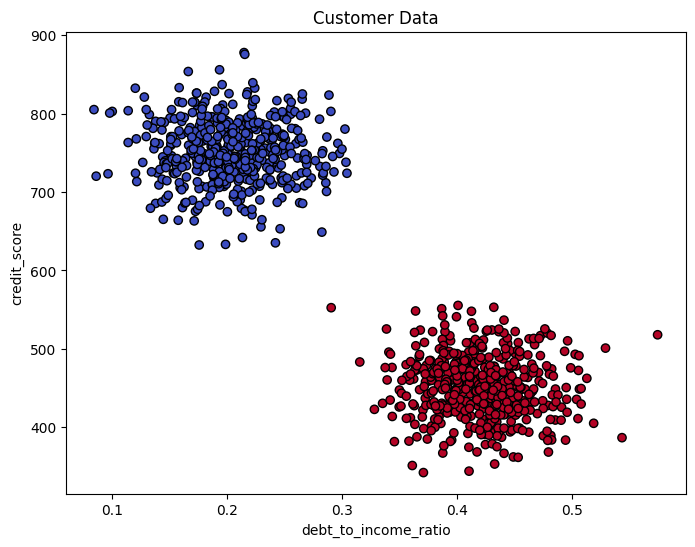

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(customers_data['debt_to_income_ratio'], customers_data['credit_score'], c=customers_data['default'], cmap='coolwarm', edgecolor='k')
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score')
plt.title('Customer Data')
plt.show()


b) Preprocess the data and build an SVM classifier with very large C value. What type of margin classifier is this?
---------------------
Large value for c obviously means that this is a hard-margin classifier.

In [5]:
# Features and labels
X = customers_data[['debt_to_income_ratio', 'credit_score']]
y = customers_data['default']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X_scaled, y)

SVC(C=1000000.0, kernel='linear')

In [6]:
x_values = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)

In [7]:
svm_coeff = svm_hard.coef_[0]
svm_intercept = svm_hard.intercept_[0]
print(svm_coeff)
print(svm_intercept)

[ 0.78813419 -3.1283347 ]
0.16409320889989798


c) Plot the decision boundary of the resulting SVM model and show the margins and the resulting support vectors. How many support vectors are there?
-------------------------

In [8]:
decision_boundary_hard = -(svm_coeff[0] * x_values + svm_intercept) / svm_coeff[1]

In [9]:
margin_hard = 1 / np.sqrt(np.sum(svm_coeff ** 2))
margin_hard_up = decision_boundary_hard + margin_hard
margin_hard_down = decision_boundary_hard - margin_hard

In [10]:
support_vectors_hard = svm_hard.support_vectors_
print(len(support_vectors_hard))

3


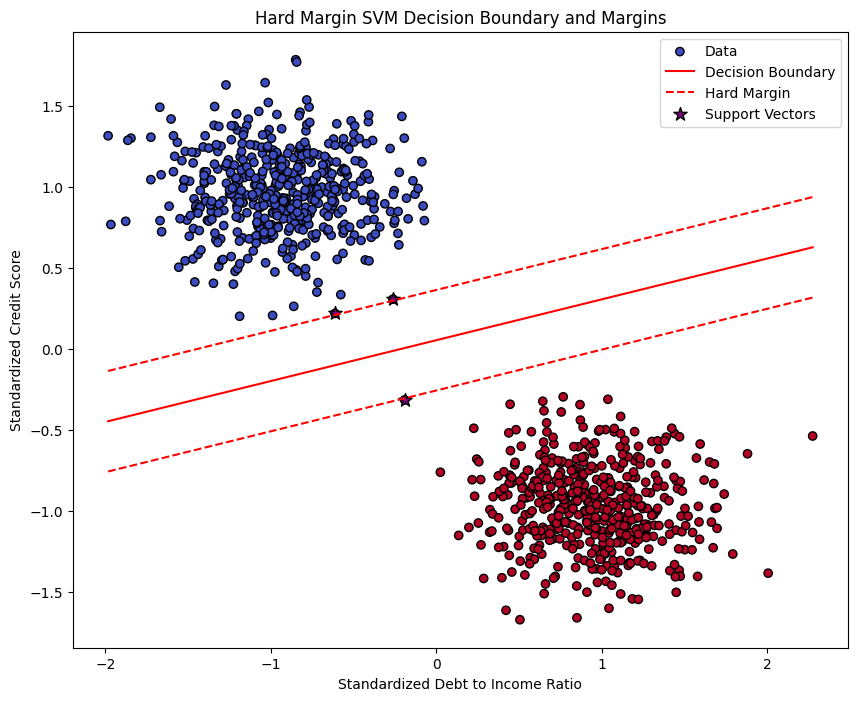

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k', label='Data')

plt.plot(x_values, decision_boundary_hard, color='red', linestyle='-', label='Decision Boundary')
plt.plot(x_values, margin_hard_up, color='red', linestyle='--', label='Hard Margin')
plt.plot(x_values, margin_hard_down, color='red', linestyle='--')

plt.scatter(support_vectors_hard[:, 0], support_vectors_hard[:, 1], s=100, edgecolor='k', facecolors='purple', label='Support Vectors', marker = "*")


plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Hard Margin SVM Decision Boundary and Margins')
plt.legend()
plt.show()

Nice plot. Also there are three support vectors, as incidcated by the stars in the plot.

d) Evaluate the classifier on the “customers_data_test.csv”. Report the value(s) of the appropriate evaluation metric(s).
------------------------------

In [12]:

test_data = pd.read_csv("/content/drive/MyDrive/MLR503 - Assignment 3/customers_data_test.csv")
X_test = test_data[['debt_to_income_ratio', 'credit_score']]
y_test = test_data['default']

X_test_scaled = scaler.transform(X_test)


y_pred = svm_hard.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200


Confusion Matrix:
[[99  1]
 [ 2 98]]


We have an accuracy of 98.5%, and an F1-score of 98% as well. This model is performing really well when trained on the partial customer data. What does the decision boundary look like when plotted against the standardized test values? Find out below.

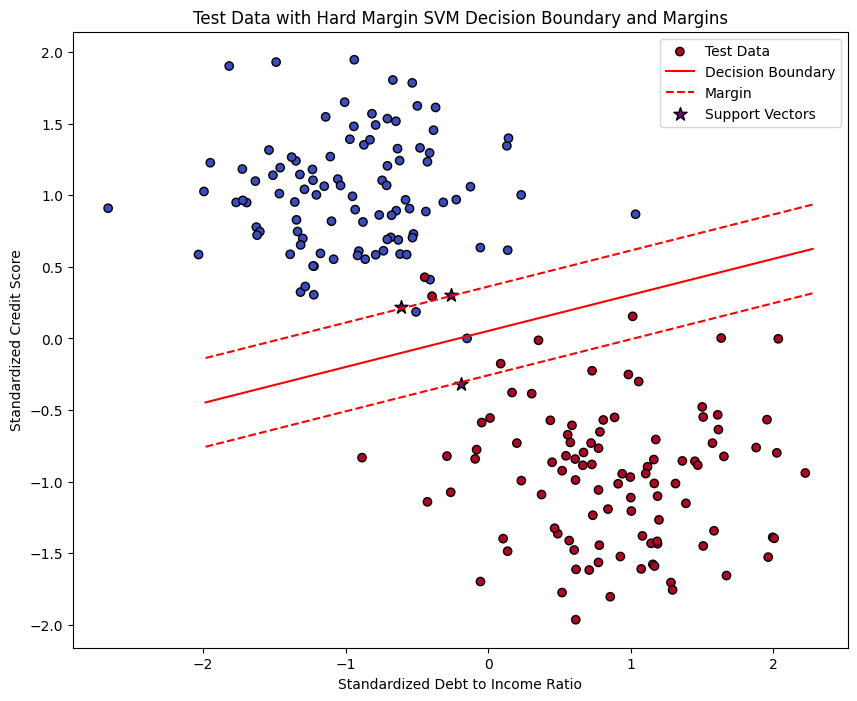

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', label='Test Data')

plt.plot(x_values, decision_boundary_hard, color='red', linestyle='-', label='Decision Boundary')
plt.plot(x_values, margin_hard_up, color='red', linestyle='--', label='Margin')
plt.plot(x_values, margin_hard_down, color='red', linestyle='--')

plt.scatter(support_vectors_hard[:, 0], support_vectors_hard[:, 1], s=100, edgecolor='k', facecolors='purple', label='Support Vectors', marker="*")

plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Test Data with Hard Margin SVM Decision Boundary and Margins')
plt.legend()
plt.show()


Everything classifies right except for 2 red points that fall above the decision boundary and 1 blue point that falls below the decision boundary. Those are our three misclassifications.

e) Use the “customers_data_full.csv” dataset to build an SVM classifier Set the value of C to be a very large value.
-------------------------------------

In [14]:
file_path_full = '/content/drive/MyDrive/MLR503 - Assignment 3/customers_data_full.csv'

customers_data_full = pd.read_csv(file_path_full)
customers_data_full.head(), customers_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   debt_to_income_ratio  2000 non-null   float64
 1   credit_score          2000 non-null   float64
 2   default               2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


(   debt_to_income_ratio  credit_score  default
 0              0.168127    718.363544        0
 1              0.410404    503.140861        1
 2              0.178578    790.184985        0
 3              0.422786    481.340185        1
 4              0.285342    729.837279        0,
 None)

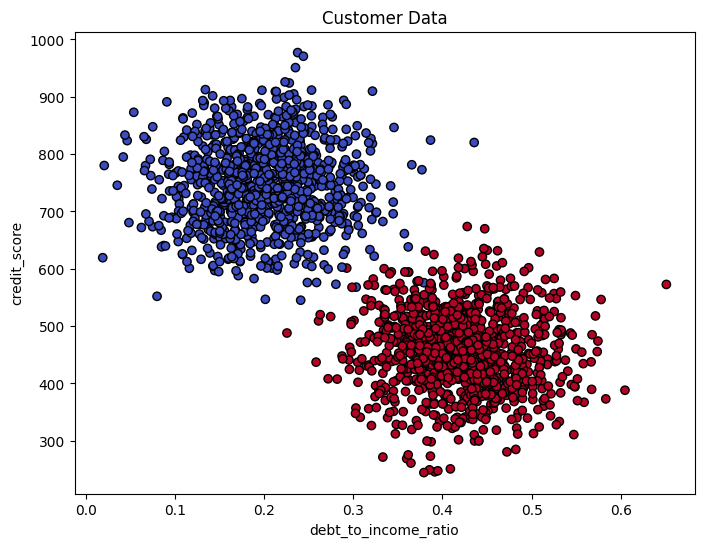

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(customers_data_full['debt_to_income_ratio'], customers_data_full['credit_score'], c=customers_data_full['default'], cmap='coolwarm', edgecolor='k')
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score')
plt.title('Customer Data')
plt.show()


More overlap. That much is clear from the scatter-plot.

In [16]:
# Features and labels
X_full = customers_data_full[['debt_to_income_ratio', 'credit_score']]
y_full = customers_data_full['default']

# Standardize features
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

svm_hard_full = SVC(kernel='linear', C=1e6)
svm_hard_full.fit(X_full_scaled, y_full)

SVC(C=1000000.0, kernel='linear')

In [17]:
x_full_values = np.linspace(X_full_scaled[:, 0].min(), X_full_scaled[:, 0].max(), 100)

In [18]:
svm_coeff_full = svm_hard_full.coef_[0]
svm_intercept_full = svm_hard_full.intercept_[0]
print(svm_coeff_full)
print(svm_intercept_full)

[ 5.21218455 -7.35653231]
-0.6203354190908834


In [19]:
decision_boundary_hard_full = -(svm_coeff_full[0] * x_full_values + svm_intercept_full) / svm_coeff_full[1]

In [20]:
margin_hard_full = 1 / np.sqrt(np.sum(svm_coeff_full ** 2))
margin_hard_up_full = decision_boundary_hard_full + margin_hard_full
margin_hard_down_full = decision_boundary_hard_full - margin_hard_full

In [21]:
support_vectors_hard_full = svm_hard_full.support_vectors_
print(len(support_vectors_hard_full))

14


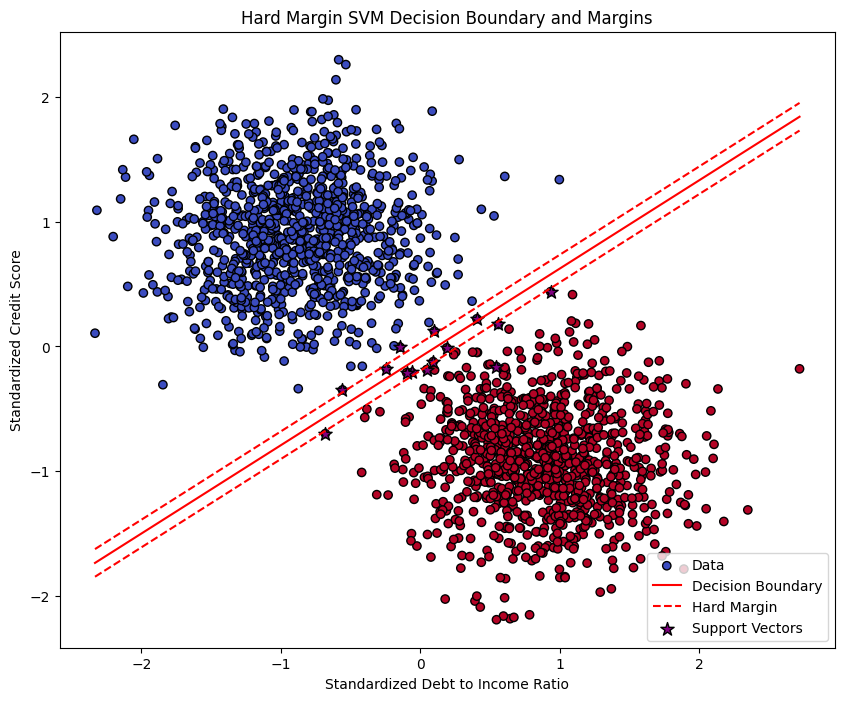

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(X_full_scaled[:, 0], X_full_scaled[:, 1], c=y_full, cmap='coolwarm', edgecolor='k', label='Data')

plt.plot(x_full_values, decision_boundary_hard_full, color='red', linestyle='-', label='Decision Boundary')
plt.plot(x_full_values, margin_hard_up_full, color='red', linestyle='--', label='Hard Margin')
plt.plot(x_full_values, margin_hard_down_full, color='red', linestyle='--')

plt.scatter(support_vectors_hard_full[:, 0], support_vectors_hard_full[:, 1], s=100, edgecolor='k', facecolors='purple', label='Support Vectors', marker = "*")


plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Hard Margin SVM Decision Boundary and Margins')
plt.legend()
plt.show()

Now we have 14 support vectors. The margins are also tiny in comparison to the partial data. This is not optimal. We will discuss why after we test on the testing dataset.

In [23]:
y_pred_full = svm_hard_full.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_full))
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred_full)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200


Confusion Matrix:
[[100   0]
 [  2  98]]


Accuracy is still at 99.0% now and the F1-score remains unchanged. Maybe this is a good classifier after all. It actually misclassifies less. Let's look at the plot:

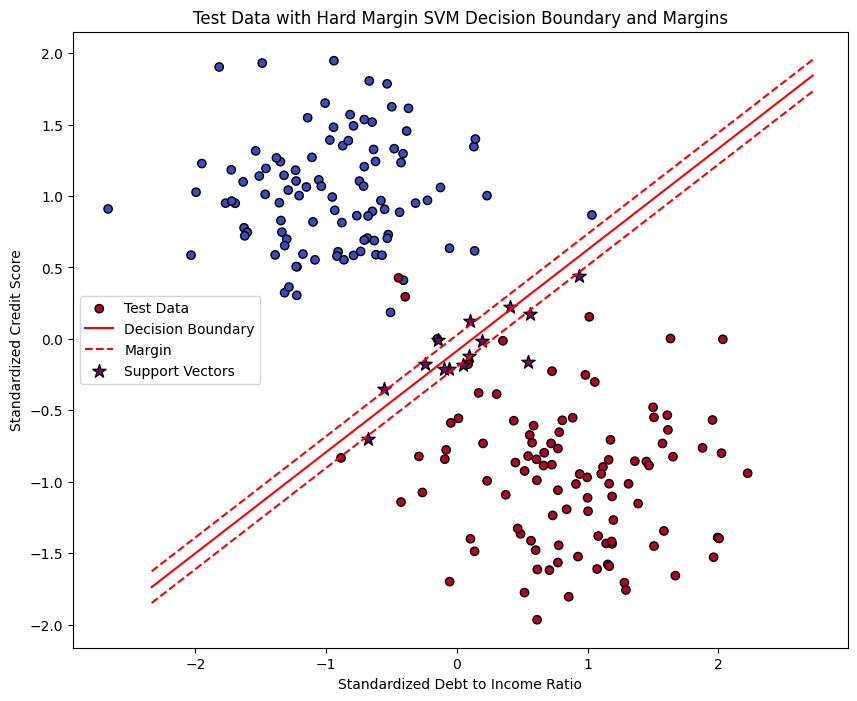

In [24]:
# Plot the test data
plt.figure(figsize=(10, 8))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', label='Test Data')

# Plot the decision boundary and margins
plt.plot(x_full_values, decision_boundary_hard_full, color='red', linestyle='-', label='Decision Boundary')
plt.plot(x_full_values, margin_hard_up_full, color='red', linestyle='--', label='Margin')
plt.plot(x_full_values, margin_hard_down_full, color='red', linestyle='--')

plt.scatter(support_vectors_hard_full[:, 0], support_vectors_hard_full[:, 1], s=100, edgecolor='k', facecolors='purple', label='Support Vectors', marker="*")

plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Test Data with Hard Margin SVM Decision Boundary and Margins')
plt.legend()
plt.show()


Clearly almost everything is being classified correctly because the decision boundary separates the testing data well.

f) Discuss any issues you run into when building an SVM classifier using “customers_data_full.csv” and a large value for C. Explain what could be causing those issues.
---------------------------------

A few things can be noted here (despite the fact that the classifier is evidently performing well):
1. Larger Cs mean larger penalizations for misclassifying on the training data. This obviously can result in overfitting because the model tries to minimize the training error more aggressively, making it less generalizable.
2. Larger Cs result in more support vectors, which, when paired with the fact that we have more constraints in general, makes the classifier less computationally efficient. It is more expensive to adhere to the constraints put on a classifier with a large C value.
3. Although this is a very simple dataset with only two input features, larger C values can cause numerical instabilities during optimization.

Again, none of this is *too* applicable here, because the model is performing well.

g & h) Build an SVM classifier that is suitable for the data in “customers_data_full.csv”. What type of margin classifier is this? Choose the value of C that results in the best performance
------------------------

Obviously we will have to build a *soft*-margin classifier now. I will do parts g and h in one go because it's easier that way. For hyperparameter-tuning, I will use Optuna. I'm not sure if you've used / worked with this before but it's much better than using something like gridsearch.

In [25]:
## Install it if you don't already have it. Colab doesn't come with it pre-loaded so it's useful to get it.
# pip install optuna


In [26]:
import optuna
from sklearn.model_selection import cross_val_score

In [32]:
def objective(trial):

    C = trial.suggest_loguniform('C', 0.001, 100.0)
    model = SVC(kernel='linear', C=C)
    accuracy = cross_val_score(model, X_full_scaled, y_full, cv=5, scoring='accuracy').mean()


    return accuracy


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=500)

# Get the best hyperparameters
best_c = study.best_params['C']
print(f"Best value of C: {best_c}")

[I 2024-11-13 19:54:15,840] A new study created in memory with name: no-name-1edd62d8-c640-4566-bb2c-ca422c058928
<ipython-input-32-3d014d70af8b>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
[I 2024-11-13 19:54:15,926] Trial 0 finished with value: 0.998 and parameters: {'C': 4.186439501117054}. Best is trial 0 with value: 0.998.
<ipython-input-32-3d014d70af8b>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
[I 2024-11-13 19:54:16,006] Trial 1 finished with value: 0.998 and parameters: {'C': 19.372177429264216}. Best is trial 0 with value: 0.998.
<ipython-input-32-3d014d7

Best value of C: 4.186439501117054


From the trials: Best value of C is 4.186439501117054

In [33]:
svm_final = SVC(kernel='linear', C=best_c)
svm_final.fit(X_full_scaled, y_full)

SVC(C=4.186439501117054, kernel='linear')

i) Plot the decision boundary of the resulting SVM model and show the margins and the resulting support vectors. How many support vectors are there?
-----------------------------

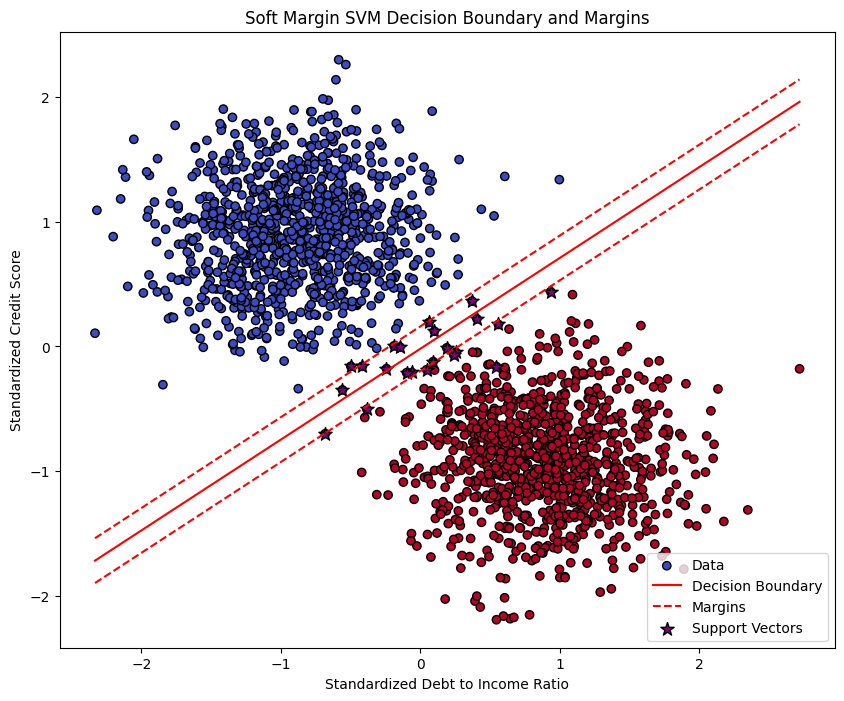

Number of support vectors: 22


In [34]:
# Calculate the decision boundary and margins
final_coeff = svm_final.coef_[0]
final_intercept = svm_final.intercept_[0]

x_values = np.linspace(X_full_scaled[:, 0].min(), X_full_scaled[:, 0].max(), 100)
decision_boundary_final = -(final_coeff[0] * x_values + final_intercept) / final_coeff[1]

margin_final = 1 / np.sqrt(np.sum(final_coeff ** 2))
margin_final_up = decision_boundary_final + margin_final
margin_final_down = decision_boundary_final - margin_final

support_vectors_final = svm_final.support_vectors_

# Plot the decision boundary and margins
plt.figure(figsize=(10, 8))
plt.scatter(X_full_scaled[:, 0], X_full_scaled[:, 1], c=y_full, cmap='coolwarm', edgecolor='k', label='Data')

plt.plot(x_values, decision_boundary_final, color='red', linestyle='-', label='Decision Boundary')
plt.plot(x_values, margin_final_up, color='red', linestyle='--', label='Margins')
plt.plot(x_values, margin_final_down, color='red', linestyle='--')

plt.scatter(support_vectors_final[:, 0], support_vectors_final[:, 1], s=100, edgecolor='k', facecolors='purple', label='Support Vectors', marker='*')

plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Soft Margin SVM Decision Boundary and Margins')
plt.legend()
plt.show()

# Print the number of support vectors
print("Number of support vectors:", len(support_vectors_final))


Now we have 22 support vectors.

Extra: Let's test this and see how it goes.
-------------------------------

In [35]:
# Predict using the final model
y_pred_final = svm_final.predict(X_test_scaled)

# Report accuracy and classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred_final)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.9900

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200


Confusion Matrix:
[[100   0]
 [  2  98]]


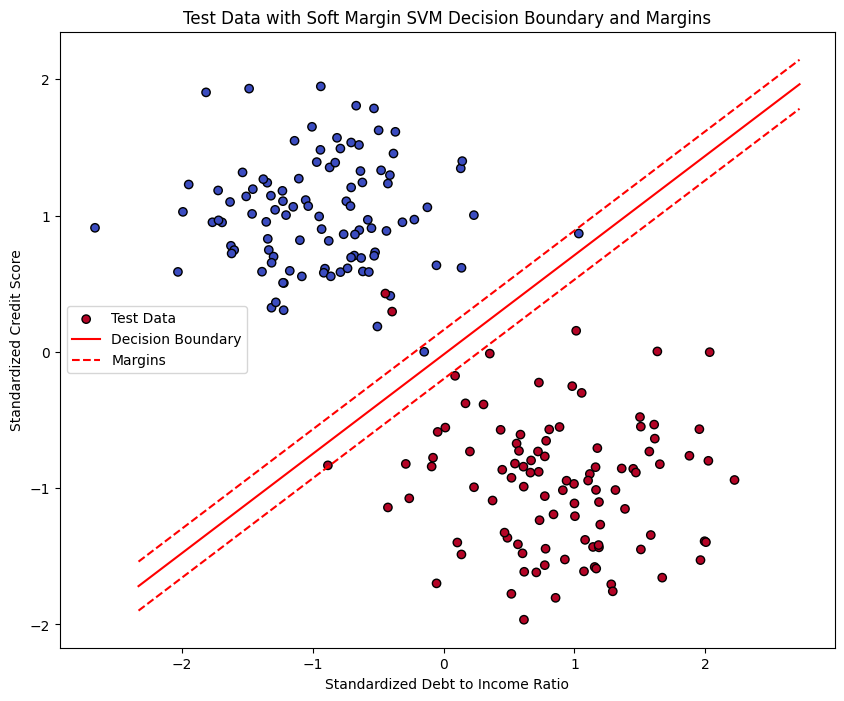

In [36]:
# Plot the test data with decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', label='Test Data')

# Plot the decision boundary and margins
plt.plot(x_values, decision_boundary_final, color='red', linestyle='-', label='Decision Boundary')
plt.plot(x_values, margin_final_up, color='red', linestyle='--', label='Margins')
plt.plot(x_values, margin_final_down, color='red', linestyle='--')

# Highlight support vectors from the training phase
## plt.scatter(support_vectors_final[:, 0], support_vectors_final[:, 1], s=100, edgecolor='k', facecolors='purple', label='Support Vectors', marker='*')

plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Test Data with Soft Margin SVM Decision Boundary and Margins')
plt.legend()
plt.show()
